# Introduction to Simpson's Rule

This code calculates the definite integral of a function using numerical methods. It approximates the area under a curve using a user-supplied number of boxes. However, the top of each box is a parabola - enabling each box to more-closely approximate the curvature of the original function.

The purpose of this file is to demonstrate the method from both a math and a coding perspective.
- The main body focuses on the math of Simpson's Rule.
- The Appendix, which follows the results of the integration, is a section explaining the specific Python commands that are used to make this work.

## Simpson's Rule Divides the domain into increments:

The domain is divided into equal-width increments using the following expressions:

$$x_i = a + i \times \Delta x$$

$$\Delta x = \frac{b-a}{n}$$

Keep in mind that this formulation only works for even values of "n."

## Simpson's Rule Performs the integration:

The following expression performs the numerical integration. Note the pattern followed by the coefficients (1, 4, 2, 4, 2, ..., 2, 4, 1).

$$S_n = \frac{\Delta x}{3} \left[ f\left(x_0\right) + 4f\left(x_1\right) +2f\left(x_2\right) +4f\left(x_3\right) + ... + 2f\left(x_{n-2}\right) + 4f\left(x_{n-1}\right) + f\left(x_n\right) \right]$$

## Error Bound for Simpson's Rule
Suppose that $\left\lvert f^{\left(4 \right)}\left(x \right) \right\rvert \leq K$ for $a \leq x \leq b$. If $E_S$ is the error involved in using Simpson's Rule, then

$$ \left\lvert E_S \right\rvert \leq \frac{K \left( b - a \right)^5}{180 n^4} $$

Don't worry, the only thing this code needs you to do is enter the fourth derivative of your function.

# Part 1: Problem Setup

## Import Python Packages

Typically, it is best practice to import the various packages you'll be using at the top of your code.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Parameters
(the problem-specific information)

### The Function

We'll make use of the "eval" command to allow the user to enter the equation as a string, which Python can then evaluate as a mathematical expression.

- *Keep in mind that the function must be entered using proper Python math syntax.*
- you must use "xi" as the variable to represent "x," the independent variable in your function.

For example, if you're trying to integrate the function 
$$f\left( x\right) = x^2 - 3x + 7$$

You should enter "xi ** 2 - 3 * xi + 7"

#### Enter the function in the cell below, inside the quotes:

In [2]:
func = "(math.cos(xi)) ** 2"

### The Limits of Integration

*The variables are named according to:*

$$ \int_a^b f \left(x \right) \,dx $$

#### Enter the limits of integration below:

In [3]:
# Lower Limit
a = 0
# Upper Limit
b = 2*math.pi

### Here's an xkcd-style plot of your function!

- the choice of 101 points to plot is arbitrary - you could use more or less to change the resolution of the figure.
- the choice of xkcd formatting is just because I think it is fun :smile:

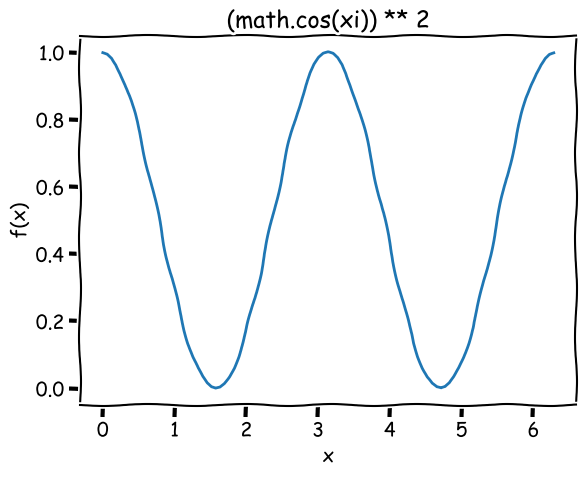

In [4]:
with plt.xkcd(): # 'with' makes the xkcd style apply to this plot only, but I don't know how it works yet...
    fig1 = plt.figure()
    plt.plot(np.linspace(a, b, 101), [eval(func) for xi in np.linspace(a, b, 101)])
    plt.title(func)
    plt.xlabel("x")
    plt.ylabel("f(x)")

#### Here's a test value of your function:

(select a value for xi that is in the domain of your function)

In [5]:
xi = 0.75
test_value = eval(func)
print(test_value)

0.5353686008338515


### Number of Increments

Numerical integration relies on dividing the domain into increments. Typically, the more increments the greater the accuracy of the result. However, adding increments increases the computational cost of the method - we must balance speed and accuracy to achieve the result we're looking for.

#### Enter the number of increments below:

In [6]:
# Number of Increments
n = 12

### The Fourth Derivative

Estimating the error of the numerical integration requires the fourth derivative of the function. We'll make use of the "eval" command to allow the user to enter the equation as a string, which Python can then evaluate as a mathematical expression.

- *Keep in mind that the function must be entered using proper Python math syntax.*
- you must use "xi" as the variable to represent "x," the independent variable in your function.
- if you don't want an error estimate, enter "0"
- if the fourth derivative is zero, enter "xi * 0" while you ponder what this means in regard to error.

In [7]:
f4 = "8 * math.cos(2*xi)"

## Problem Summary:

In [8]:
print(f"Let's take the integral of {func} from {a} to {b} using {n} increments!")

Let's take the integral of (math.cos(xi)) ** 2 from 0 to 6.283185307179586 using 12 increments!


# Part 2: Compute Integral

## Initialization
The first part of calculating a solution is populating the various variables we'll need. This involves some calculations to find the various "ingredients" needed for Simpson's Rule.

 - 'deltaX' is a single-valued float that we need to calculate
 - 'x' is a list of all $x$ values we'll evaluate the function at, determined using $a + i \Delta x$
 - 'ci' is the coefficient list - Simpson's Rule uses coefficients to weight the value of each point at which the function is evaluated following the pattern: $\left(1, 4, 2, 4, ... 2, 4, 1 \right)$

### Calculate $\Delta x$

In [9]:
deltaX = (b-a)/n
print(f"deltaX is {deltaX}")

deltaX is 0.5235987755982988


### Build the Grid ($x$-values)

Numerical methods such as Simpson's Rule divide the continuous domain into a grid of specific x-values. These are the values of x at which we'll actually evaluate the function, and they define the divisions between each increment that we're adding together to compute the integral.

Let $x = \{a + i \times \Delta x  \mid  0 \leq i < n \}$ 

Now we have a list filled with each value of $a + i \times \Delta x$.

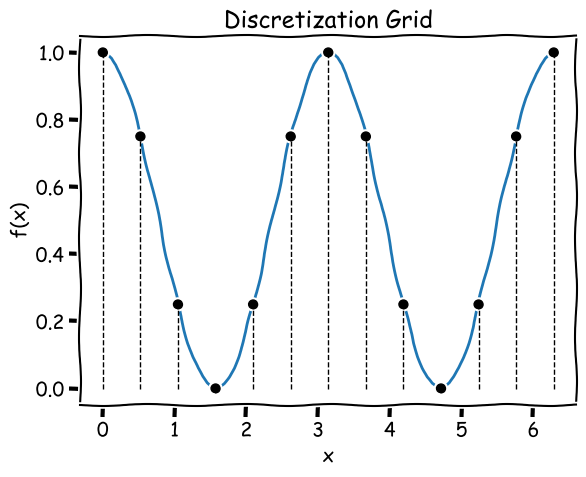

In [10]:
x = [a + deltaX * i for i in range(n+1)]

with plt.xkcd(): # 'with' makes the xkcd style apply to this plot only, but I don't know how it works yet...
    fig2 = plt.figure()
    plt.plot(np.linspace(a, b, 101), [eval(func) for xi in np.linspace(a, b, 101)])
    plt.plot(x, [eval(func) for xi in x],'ok')
    plt.title('Discretization Grid')
    plt.xlabel("x")
    plt.ylabel("f(x)")

# plot vertical dashed lines to divide the regions
for i in range(n+1):
    xi = x[i]
    plt.plot([x[i], x[i]], [0, eval(func)],'--k',linewidth = 1)

### Build the Coefficient List ($c_i$)
This numerical integration method uses coefficients to give weight to the individual values. Ultimately this is part of what makes the method use parabolas instead of straight lines to approximate the top of each box.

$$c_i = \left(1,4,2,4,2,...,2,4,1\right)$$

- Remember the true number of elements in the list is $n + 1$.
    - If $n = 12$, there are $13$ elements
- There are $\frac{n-2}{2}$ elements in the middle of the list.
    - This is how many `[4,2]` pairs we need.

In [26]:
ci = [1] + [4,2] * round((n-2)/2) + [4,1]
print("Here's the coefficient list, ci:")
print(ci)

Here's the coefficient list, ci:
[1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1]


## Integration
Now that the variables are initialized, we can evaluate the integral!

$$ \int_{a}^{b} f\left(x\right) \,dx \approx 

S_n = \frac{\Delta x}{3} \left[ f\left(x_0\right) + 4f\left(x_1\right) +2f\left(x_2\right) +4f\left(x_3\right) + ... + 2f\left(x_{n-2}\right) + 4f\left(x_{n-1}\right) + f\left(x_n\right) \right]$$

### Evaluate $f\left( x_i \right)$
The first step of evaluating the integral is to evaluate the function at each value of $x$.

In [12]:
fx = [eval(func) for xi in x] #remember, 'func' is a string, 'eval' runs the string as a python command
print("Your function f(x) evaluated at each value of x in the grid:")
print(*fx, sep = "\n")

Your function f(x) evaluated at each value of x in the grid:
1.0
0.7500000000000001
0.2500000000000001
3.749399456654644e-33
0.24999999999999978
0.7499999999999997
1.0
0.7500000000000003
0.25000000000000044
3.374459510989179e-32
0.24999999999999928
0.7499999999999996
1.0


#### Here's a plot of your function showing everything we've done:

##### The commented code below does the following steps:
- plot the original function on a 'hi-res' grid
- for each region that we're dividing the graph into:
    - solve for the equation of parabola which touches the endpoints and midpoint of the region (details below)
    - plot the parabola which forms the top of each 'box' - this is what Simpson's Rule does
- plot the points we're actually evaluating (the endpoints of each region) 
- plot vertical dashed lines to divide the regions

##### How to plot a parabola through 3 points:
The equation of a parabola is $y \left( x \right) = Ax^2 + Bx + C$. This equation has 3 unkown coefficients ($A$, $B$, and $C$), so we need 3 known points to solve for them:
- The Left end of the region: $x_0$ and $y\left( x_0 \right)$
- The Midpoint of the region: $x_1 = \frac{x_2 - x_0}{2}$ and $y\left( x_1 \right)$
- The Right end of the region: $x_2$ and $y\left( x_2 \right)$

Evaluating gives us 3 equations with 3 unknowns:

$$y\left( x_0 \right) = Ax_0^2 + Bx_0 + C$$
$$y\left( x_1 \right) = Ax_1^2 + Bx_1 + C$$
$$y\left( x_2 \right) = Ax_2^2 + Bx_2 + C$$

These equations can be solved using matrix math to obtain values for $A$, $B$, and $C$.

$$\left[\begin{array}{cc} 
x_0^2 & x_0 & 1\\
x_1^2 & x_1 & 1\\
x_2^2 & x_2 & 1
\end{array}\right]
\left[\begin{array}{c} 
A\\ 
B\\
C
\end{array}\right]
=
\left[\begin{array}{c} 
y\left( x_0 \right)\\ 
y\left( x_1 \right)\\
y\left( x_2 \right)
\end{array}\right]$$

To solve for the coefficients $A$, $B$, and $C$, invert the matrix:

$$\left[\begin{array}{c} 
A\\ 
B\\
C
\end{array}\right]
=
\left[\begin{array}{cc} 
x_0^2 & x_0 & 1\\
x_1^2 & x_1 & 1\\
x_2^2 & x_2 & 1
\end{array}\right]^{-1}
\left[\begin{array}{c} 
y\left( x_0 \right)\\ 
y\left( x_1 \right)\\
y\left( x_2 \right)
\end{array}\right]$$

#### Loop through each region
The process of finding the parabola is performed in a loop so that each region's parabola can be plotted.

Note: the dashed lines below are the parabolas which approximate the real curve (solid thick line). Even using a relatively small number of regions, the parabolas do a pretty great job of approximating the real function. However, if you look closely you'll see that there are differences between the true curve and the parabolas.


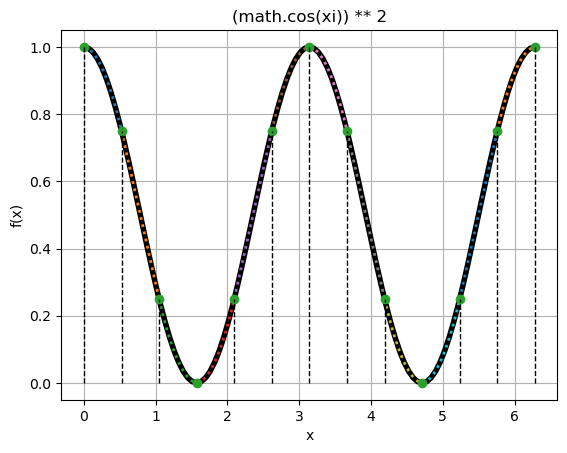

In [13]:
fig3 = plt.figure()
# plot the original function on a 'hi-res' grid
plt.plot(np.linspace(a, b, 101), [eval(func) for xi in np.linspace(a, b, 101)], '-k',linewidth = 4)

# for each region that we're dividing the graph into:
for i in range(n):
    # solve for the equation of parabola which touches the endpoints and midpoint of the region
    x0 = x[i]
    x2 = x[i+1]
    x1 = (x2 + x0)/2
    
    X = np.array([[x0**2, x0, 1],
                  [x1**2, x1, 1],
                  [x2**2, x2, 1]])

    xi = x1
    yi = eval(func)
    Y = np.array([  [fx[i]],
                    [yi],
                    [fx[i+1]]])

    ABC = np.linalg.inv(X) @ Y # '@' is matrix multiplication

    # plot the parabola which forms the top of each 'box' - this is what Simpson's Rule does
    plt.plot(np.linspace(x0, x2, 101), [ABC[0]*(xi**2) + ABC[1]*xi + ABC[2] for xi in np.linspace(x0, x2, 101)],':', linewidth = 2)

# plot the points we're actually evaluating (the endpoints of each region)
plt.plot(x,fx,'o')
plt.title(func)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

# plot vertical dashed lines to divide the regions
for i in range(n+1):
    plt.plot([x[i], x[i]], [0, fx[i]],'--k',linewidth = 1)


### Multiply $f\left(x_i\right)$ by the coefficients for Simpson's Rule
Next, we multiply each of the values of $f\left( x \right)$ by the appropriate coefficient from Simpson's Rule to obtain the elements of the sum:

$$\left[ f\left(x_0\right) + 4f\left(x_1\right) +2f\left(x_2\right) +4f\left(x_3\right) + ... + 2f\left(x_{n-2}\right) + 4f\left(x_{n-1}\right) + f\left(x_n\right) \right]$$

In [14]:
Si = [ci[i] * fx[i] for i in range(n+1)]
print("Si looks like:")
print(*Si, sep = "\n")

Si looks like:
1.0
3.0000000000000004
0.5000000000000002
1.4997597826618576e-32
0.49999999999999956
2.9999999999999987
2.0
3.0000000000000013
0.5000000000000009
1.3497838043956716e-31
0.49999999999999856
2.9999999999999982
1.0


### Perform the sum and multiply by $\frac{\Delta x}{3}$

$$S_n = \frac{\Delta x}{3} \left[ f\left(x_0\right) + 4f\left(x_1\right) +2f\left(x_2\right) +4f\left(x_3\right) + ... + 2f\left(x_{n-2}\right) + 4f\left(x_{n-1}\right) + f\left(x_n\right) \right]$$

In [15]:
S = sum(Si)*(deltaX/3) #the sum function adds all elements of a list
print(f"The integral of {func} from {a} to {b} is {S}")

The integral of (math.cos(xi)) ** 2 from 0 to 6.283185307179586 is 3.1415926535897922


## Error Estimate
Now that we've evaluated the integral, we can estimate the accuracy of our estimate.

### Evaluate $f^{\left( 4 \right)}\left( x_i \right)$
The first step of estimating the error is to evaluate the fourth derivative at each value of $x$.

In [16]:
print(f"Let's evaluate {f4} at each value of x.")
f4x = [eval(f4) for xi in x]
print("f4x looks like:")
print(*f4x, sep = "\n")

Let's evaluate 8 * math.cos(2*xi) at each value of x.
f4x looks like:
8.0
4.000000000000001
-3.9999999999999982
-8.0
-4.0000000000000036
3.9999999999999942
8.0
4.000000000000004
-3.9999999999999933
-8.0
-4.0000000000000115
3.999999999999993
8.0


### Find $K$ the maximum absolute value of $f^{\left( 4 \right)}\left( x_i \right)$

We need  $\left\lvert f^{\left(4 \right)}\left(x \right) \right\rvert \leq K$ for $a \leq x \leq b$

- Take the absolute value of each value of $f^{(4)}\left(x\right)$
- Max returns the largest value, which is 'K' in the error estimate formula

In [17]:
K = max([abs(item) for item in f4x])
print(f"K is {K}")

K is 8.0


### Estimate Error using the formula

$$ \left\lvert E_S \right\rvert \leq \frac{K \left( b - a \right)^5}{180 n^4} $$

In [18]:
ES = (K * ((b-a)**5)) / (180*(n**4))
print(f"The integral is {S} with an error of {ES}")
print(f"The true value of the integral is in [{S-ES}, {S+ES}]")

The integral is 3.1415926535897922 with an error of 0.02098900444343494
The true value of the integral is in [3.120603649146357, 3.1625816580332273]


# Appendix: Python Coding Explanations

Below, you'll find explanations for the key aspects of the code, from a Python coding perspective.

*Remember, half the reason I created this code is to teach myself Python and Jupyter Notebooks. If you see a poor explanation, or a better way to accomplish a task, I hope you'll reach out via [GitHub](https://github.com/TonyFerrar/numerical-integration/issues) and suggest updates:*



## Plotting a mathematical function in Python

### Required Modules:

"math", "numpy", and "matplotlib" all have functions used in this code.
- `math`: contains all the special functions, such as trig and exponentials
- `numpy`: contains matrix math and other array-related commands:
    - matrix inverse used to find coefficients that plot the parabolas
    - `linspace` to create lists of $x$ values in plots
- `matplotlib.pylot`: contains plotting commands used to visualize
- `%matplotlib inline`: turns on the in-line plot option, so that graphs embed nicely in this notebook
    - the alternative is to manage each plot window manually, using commants such as plt.show()

```
    import math
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
```
Note: adding `as plt` gives the `matplotlib.pyplot` module a nickname to make it easier to reference. Without this nickname, we'd need top use `matplotlib.pyplot.plot(x,y)` each time we want to make a graph. With the nickname this shortens to `plt.plot(x,y)`


### How plotting works on a computer
The computer understands data, not mathematical functions. People are capable of picturing a function's graph based purely on understanding. For instance, if I asked you to picture the graph of $x^2$, you likely see a parabola in your mind's eye. Computers can't do this.

When producing a graph, all the computer really does is play 'connect the dots' with data. What this means is that the plot commands are expecting data (rather than functions). We must build lists of $x$ and $y$ values for every plot:

- Create a list of $x$ values
- Create a list of $y$ values by evaluating $y = f\left(x\right)$ at each value of $x$
- Call the `plot(x,y)` command and let it play "connect the dots" with your data 

Below is an example.

#### First, create a list of $x$ values:
$x$ values are uniformly distributed between the values of 'start' and 'stop' using 'n' values.

- `linspace(start, stop, n)` produces a list of values from 'start' to 'stop' using 'n' increments
- the plots in this code use the limits of integration as the 'start' and 'stop' values so that the region of the function that we're looking at is the same as the region of the function we're integrating

In [19]:
start = 2
stop = 10
n = 9 #there are 9 integers from [2, 10] (including 2 and 10)
x = np.linspace(start, stop, n) #np is the numpy package we imported, linspace is a command from that package
print(x)

[ 2.  3.  4.  5.  6.  7.  8.  9. 10.]


#### Second, create a list of $y$ values:
$y$ values are calculated by evaluating the mathematical function at each $x$ value.


| $x$ | $y = f\left(x\right)$ |
| :---: | :---: |
| $x_0$ | $y\left(x_0 \right)$ |
| $x_1$ | $y\left(x_1 \right)$ |
| $x_2$ | $y\left(x_2 \right)$ |
| $\vdots$ | $\vdots$ |
| $x_n$ | $y\left(x_n \right)$ |


- We need to loop through each $x$ value to calculate each $y$ value in the table
    - This could be done in a traditional `for` loop.
    - The example below uses $y\left(x\right) = x^2$

In [20]:
y = [0] * (n) #create an array of zeros the same size as 'x', which has 'n' elements
print('y filled with zeros:')
print(y)

for i in range(n):
    y[i] = x[i]**2

print('y calculated from x:')
print(y)

y filled with zeros:
[0, 0, 0, 0, 0, 0, 0, 0, 0]
y calculated from x:
[4.0, 9.0, 16.0, 25.0, 36.0, 49.0, 64.0, 81.0, 100.0]


- A **list comprehension** is a more compact way of accomplishing the same goal in Python.
    - There is a detailed explanation of **list comprehension** elsewhere in this file.
    - This is how $x$ is actually calculated in the plot commands used in this file.

In [21]:
y = [xi**2 for xi in x] # list comprehension is a for loop in a single line
print('y calculated from x:')
print(y)

y calculated from x:
[4.0, 9.0, 16.0, 25.0, 36.0, 49.0, 64.0, 81.0, 100.0]


#### Third, call the 'plot' command

`plot(x, y, linestyle)` produces a plot based on the values stored in $x$ and $y$.

- $x$ and $y$ must be lists of values, and they must be the same size
    - that's what we calculated above in this example
- "linestyle" is an optional third argument to the plot() command.
    - '-' makes a line
    - 'o' makes circles at actual points
    - 'k' makes it black
    - the individual linestyles combine inside quotes: '-ok'

Text(0, 0.5, 'f(x)')

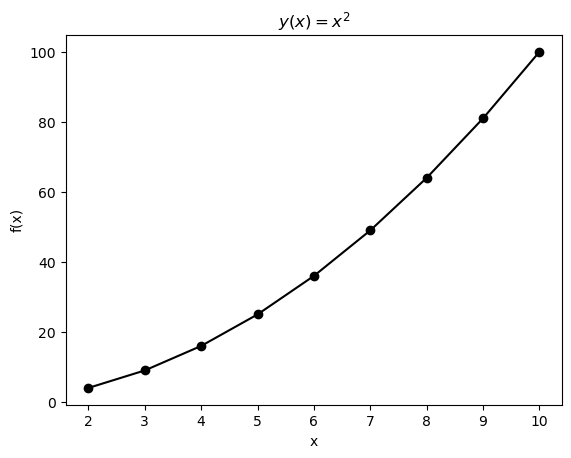

In [22]:
plt.plot(x, y,'-ok') # ",-ok" adds an optional linestyle: solid line, circle data markers, black color
plt.title('$y( x ) = x^2$')
plt.xlabel("x")
plt.ylabel("f(x)")

#### Putting it all together:
The example above is detailed to help you understand how plotting works in Python. However, we can produce the plot of a function much more compactly. The code below combines everything you saw above into its most compact form. In short, $x$ and $y$ are calculated as arguments to the plot command rather than stand-alone variables:

Text(0, 0.5, 'f(x)')

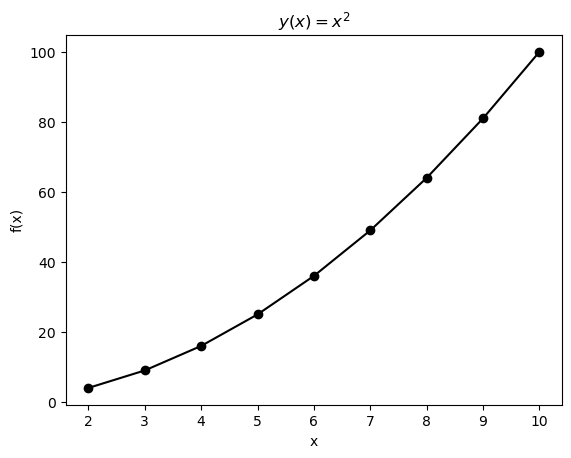

In [23]:
plt.plot(np.linspace(start, stop, n), [xi**2 for xi in np.linspace(start, stop, n)], '-ok')
plt.title('$y( x ) = x^2$')
plt.xlabel("x")
plt.ylabel("f(x)")

# List Comprehensions

### Initialize $x$ using 'range' and 'list comprehensions'

The goal: populate a list of $x$-values to evaluate our function at. We want to use

$$\Delta x = \frac{b-a}{n}$$

Which means the list should look like

$$\left[a, a+\Delta x, a+2\Delta x, a+3\Delta x, ... , a+i\Delta x, ..., a+n\Delta x\right]$$


 - First, we'll use "range" to create a list of integers from $0$ to $n+1$. These are the $i$ values.
 - Then we multiply the $i$ values by $\Delta x$.
     - We can do this in a single line using a 'List Comprehension'
     - It is like a 'for' loop in a single line:
         - `[deltaX * item for item in range(n+1)]` takes each item in the `range` and multiplies it by `deltaX`
     - Now we have a list filled with $i \times \Delta x$.
 - Lastly, we add $a$ to each item, because we want to start at the lower limit of integration
     - Now we have a list filled with each value of $a + i \times \Delta x$.

In [24]:
x = [a + deltaX * i for i in range(n+1)]
print("Here are the x-values that define your grid:")
print(*x, sep = "\n")

Here are the x-values that define your grid:
0.0
0.5235987755982988
1.0471975511965976
1.5707963267948966
2.0943951023931953
2.617993877991494
3.141592653589793
3.665191429188092
4.1887902047863905
4.71238898038469


### Initialize the Coefficient List using 'Slicing'
This numerical integration method uses coefficients to give weight to the values. Ultimately this is part of what makes the method use parabolas instead of straight lines to approximate the top of each box.

$$c_i = \left(1,4,2,4,2,...,2,4,1\right)$$

Build the list by combining 3 lists:
- [1] + [middle] + [4,1]
- [1] is the first element
- [middle] can be built using list multiplication:
    - If we want [4,2,4,2,4,2] we can use `[4,2] * 3` = [4,2,4,2,4,2]
    - We need the number of elements in the middle of the list to decide how many [4,2] pairs are needed.
    - Remember the true number of elements in the list is n + 1.
        - If n = 12, there are 13 elements
    - `round((n-2)/2)` takes the number of elements in the middle of the list and divides by $2$. This is how many [4,2] pairs we need.
        - If $n = 12$, $(n-2)/2 = (12 - 2)/2 = 5$.
        - Note: $n$ is even, so $(n-2)/2$ is always a whole number. The rounding is performed because we're using the result of this calculation as a looping index. Looping indices must be cast as integers.
            - Division returns a `float` by defaul in Python, which cannot be used as an index because indices must be integers.
            - `round` returns an `int` by default - though I wonder if we could use `int(n)` to accomlish the same task?
    - Therefore, [middle] = [4,2] * round((n-2)/2)
- [4, 1] at the end adds the last 2 elements

In [25]:
ci = [1] + [4,2] * round((n-2)/2) + [4,1]
print("ci looks like:")
print(*ci, sep = "\n")

ci looks like:
1
4
2
4
2
4
2
4
2
4
1
